 # Exploratory Analysis and Visualisation of Nigerian Kagglers using Kaggle's 2021 Data Science and Machine Learning survey

**Author - Dr Adeayo Sotayo**

You can connect with me on [Twitter](https://twitter.com/drsotayo), [Github](https://github.com/drsotayo) and [LinkedIn](https://www.linkedin.com/in/adeayosotayo/).

You can also check out my [personal website](https://www.drsotayo.com/).

An **executive summary** of this notebook is [available here](https://www.drsotayo.com/wp-content/uploads/2021/11/2021-Kaggle-Survey-A-focus-on-Nigerian-Kagglers.pdf). 

# Introduction 

Kaggle is an online community of students, data scientists and machine learning practitioners from around the world. Kaggle allows people to undertake courses, learn, find and publish datasets, explore and build models in a web-based data-science environment, work with other data scientists and machine learning engineers, and enter competitions to solve data science challenges. 

This year (2021), Kaggle carried out its 5th Machine Learning & Data Science Survey, which received over 25,000 responses from users globally. It covered data science and machine learning questions for students and professionals across several industries, including their educational backgrounds, salaries, sectors, programming languages and techniques and many more. 

Focusing on the 2021 dataset, this analysis focuses on a unique and specific subset of the dataset, i.e., Nigerian Kagglers, represented in this survey.

Nigeria is a country in West Africa and the most populous country in Africa with over [210,000,000 people](https://www.worldometers.info/world-population/nigeria-population/) and boasts of the largest economy in Africa. As such, this analysis aims to answer some questions related to Nigerian Kagglers, which are shown below: 

•	What’s the **uptake of Nigerians on Kaggle** and **how has it changed** over the past few years, and **how will it change** over the next few years? 

•	In a **global and African context**, how are Nigerians performing on Kaggle?

•	What **educational qualifications** do Nigerian Kagglers possess?

•	What are the **age ranges** and **gender distributions** of Nigerian Kagglers?

•	How much do Nigerian Kagglers **earn**? 

•	What **jobs** do Nigerian Kagglers do, and how does the **salary** vary between these jobs?

•	What **sectors** do they work in?

•	What are the most common **programming languages** and **integrated development environments (IDEs)** used by Nigerian kagglers?

•	What are the commonly used **machine learning frameworks** and **machine learning algorithms** used by Nigerian Kagglers? 

•	What **platforms and media sources** do Nigerian Kagglers use to learn more about data science? 

This notebook mainly uses **Pandas** to manipulate the dataset and **Plotly** for the visualisation due to its interactive features.

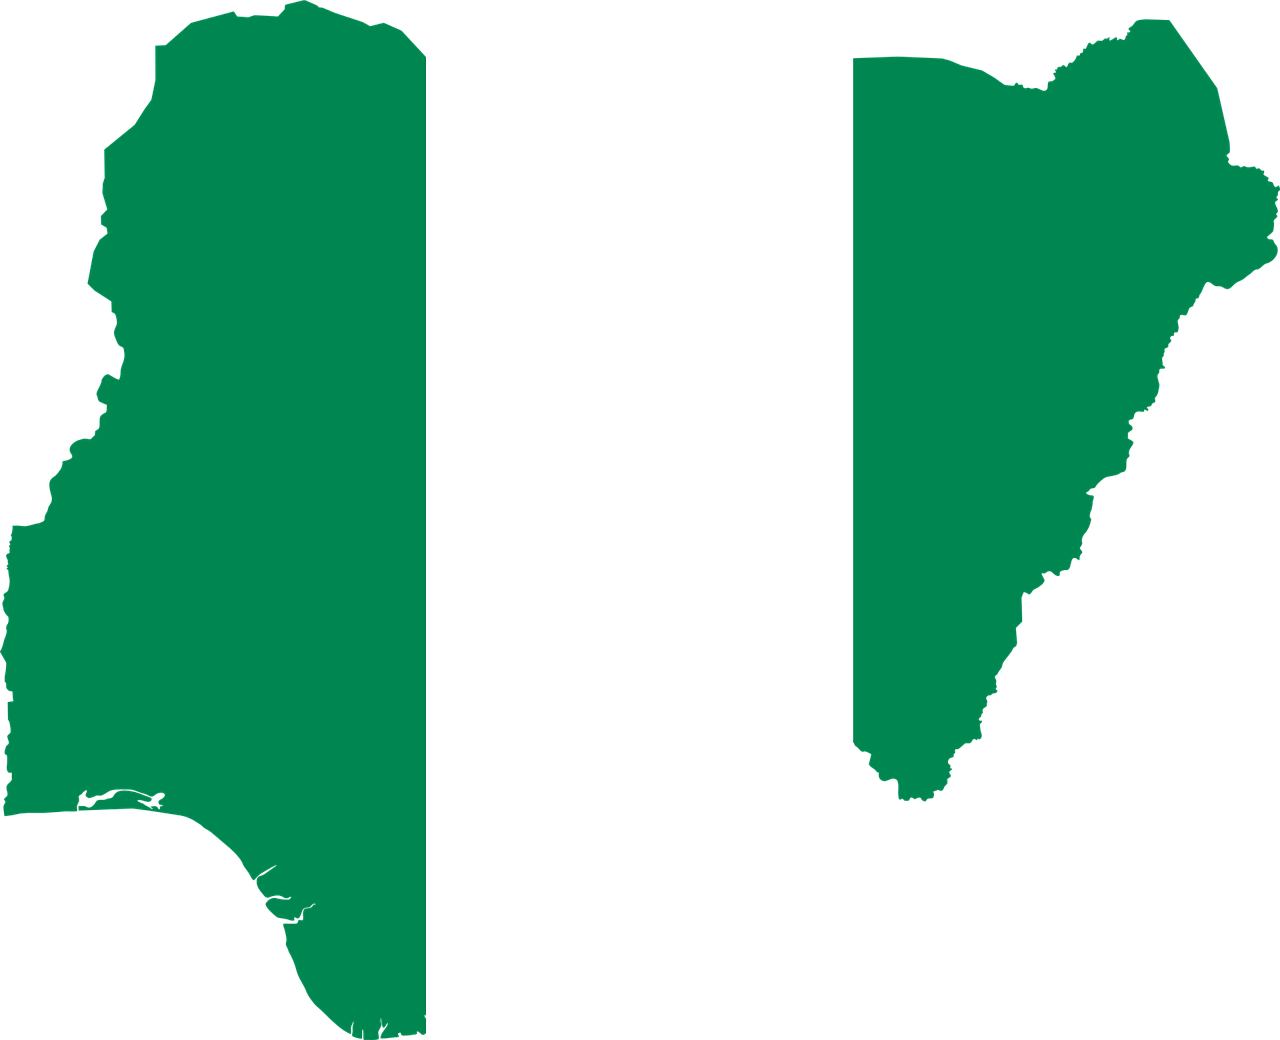

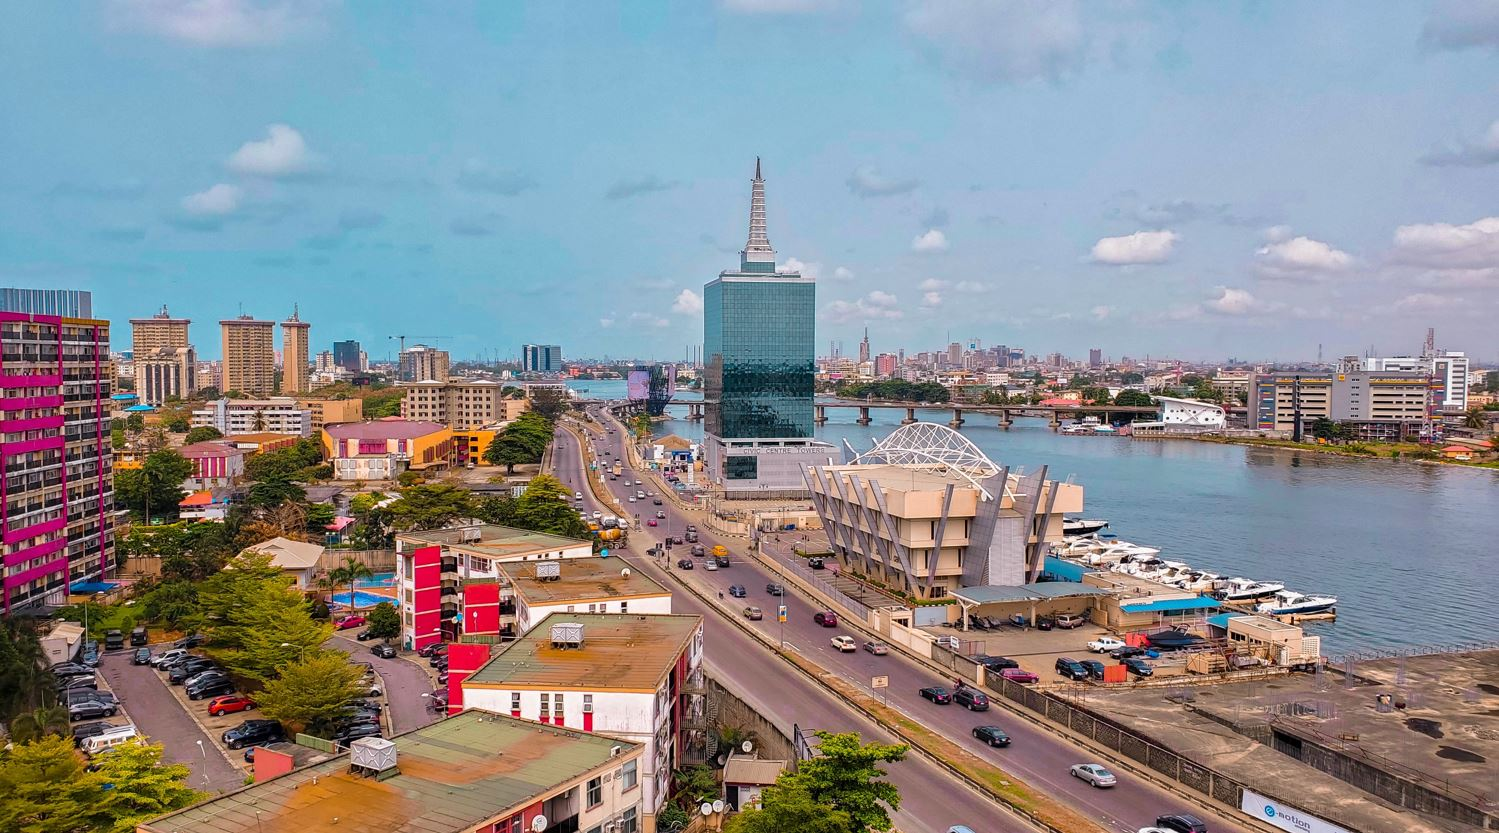

*Photo by Nupo Deyon Daniel on Unsplash*

In [ ]:
import pandas as pd 
import numpy as np 
#import seaborn as sns
#import matplotlib.pyplot as plt 

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv", low_memory=False) #2021 Kaggle survey data
df = df.drop([0], axis=0) #this removes the row with the questions

df_2017 = pd.read_csv("/kaggle/input/kaggle-survey-2017/multipleChoiceResponses.csv", encoding="ISO-8859-1", low_memory=False) #2017 Kaggle survey data
df_2018 = pd.read_csv("/kaggle/input/kaggle-survey-2018/multipleChoiceResponses.csv", low_memory=False) #2018 Kaggle survey data
df_2019 = pd.read_csv("/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv", low_memory=False) #2019 Kaggle survey data
df_2020 = pd.read_csv("/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv", low_memory=False) #2020 Kaggle survey data

# enable showing all columns and rows
pd.set_option('display.max_columns', None) #show all columns
#pd.set_option('display.max_rows', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

colors_ng = "green" #chart color for Nigerian Kagglers.
colors_rotw = "gold" #chart color for the rest of the world.

In [ ]:
df.shape[0]

The total number of responses globally was **25973**

In [ ]:
df[df.columns[3]].replace({'United Kingdom of Great Britain and Northern Ireland':'UK',
                           'Iran, Islamic Republic of...':'Iran',
                           'United Arab Emirates':'UAE',
                           'United States of America':'USA',
                           'Viet Nam':'Vietnam'}, inplace=True)

In [ ]:
print(f" List of countries that participated in the Kaggle's 2021 Data Science and Machine Learning survey:\n{np.sort(df[df.columns[3]].unique())}\n")

In [ ]:
print(f" Total number of countries that participated in the Kaggle's 2021 Data Science and Machine Learning survey:\n{(len(np.sort(df[df.columns[3]].unique())) - 2)}\n")

#(-2 for "Other" & "I do not wish to disclose my location")

# Top 10 countries with the most Kagglers

In [ ]:
top10_countries = df['Q3'].value_counts(normalize=True, ascending=False) #Count the number of countries and express it as a fraction
top10_countries = top10_countries.drop(["Other"], axis=0) #drop "Other"
top10_countries = top10_countries.mul(100) #multiply the values by 100 (i.e. percentage)
top10_countries = top10_countries.rename("percentage (%)").reset_index()
top10_countries = top10_countries.rename(columns={"index":"country"})
top10_countries = top10_countries.head(10).round(decimals=1)



top10_countries["color"] = "gold" #color the others gold
top10_countries.loc[top10_countries["country"] == "Nigeria", ["color"]] = "green" #color Nigeria green

fig = px.bar(top10_countries, x="country", y="percentage (%)", text='percentage (%)', 
             title="Top 10 countries with the most Kagglers")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color=top10_countries.color) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")

fig.show()


* The top three countries are **India**, **USA** and **Japan**.

* In comparison to other countries,  **Nigeria Kagglers make up about 2.7%** and **Nigeria ranks 7th.**

* Coincidentally, Nigeria is also ranked as the [7th most populated country in the world](https://www.worldometers.info/world-population/population-by-country/).

# Top countries within Africa

In [ ]:
africa = ['Algeria', 'Egypt', 'Ethiopia','Ghana', 'Kenya', 'Morocco', 'Nigeria', 'South Africa', 
          'Tunisia', 'Uganda'] #List of African countries

africa_countries = df[df['Q3'].isin(africa)]
africa_countries = africa_countries["Q3"].value_counts(normalize=True, ascending=True) 
#Count the number of countries within Africa and express it as a fraction
africa_countries = africa_countries.mul(100) #multiply the values by 100 (i.e. percentage)
africa_countries = africa_countries.rename("percentage (%)").reset_index()
africa_countries = africa_countries.rename(columns={"index":"country"})
africa_countries = africa_countries.round(decimals=1) 


africa_countries["color"] = "gold" #color the others gold
africa_countries.loc[africa_countries["country"] == "Nigeria", ["color"]] = "green" #color Nigeria green

fig = px.bar(africa_countries, y="country", x="percentage (%)", text='percentage (%)', 
             title="Ranking of African countries with the most Kagglers", orientation="h")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color=africa_countries.color) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")

fig.show()

In [ ]:
interactive_map_africa = px.choropleth(africa_countries,
                    locations="country", #Spatial coordinates and corrseponds to a column in dataframe
                    color="percentage (%)", #Corresponding data in the dataframe
                    locationmode = 'country names', #location mode == One of ‘ISO-3’, ‘USA-states’, or ‘country names’ 
                    #locationmode == should match the type of data entries in "locations"
                    scope="africa", #limits the scope of the map to Africa
                    title ="African Kagglers",
                    hover_name="country",
                    color_continuous_scale = "Greens",
                   )
interactive_map_africa.update_traces(marker_line_color="black") # line markers between states
interactive_map_africa.show()

In [ ]:
country_plus_pop = {"country":['Algeria', 'Egypt', 'Ethiopia','Ghana', 'Kenya', 'Morocco', 'Nigeria', 'South Africa', 
          'Tunisia', 'Uganda'], "africa_population":[43_851_044, 	102_334_404, 114_963_588, 31_072_940, 53_771_296, 
                  36_910_560, 206_139_589, 59_308_690, 	11_818_619, 45_741_007 ] }
#Reference for the population of each African country - https://www.worldometers.info/population/countries-in-africa-by-population/ 
country_plus_pop = pd.DataFrame(country_plus_pop)

africa_countries_count = df[df['Q3'].isin(africa)]["Q3"].value_counts().rename("country_count").reset_index()

country_per_pop = pd.merge(country_plus_pop, africa_countries_count, left_on="country", right_on="index") #merge both tables using Pandas 
country_per_pop["count_per_ten_million_population"] = round(country_per_pop["country_count"]/country_per_pop["africa_population"] * 10_000_000) #per ten million population
country_per_pop.sort_values(by="count_per_ten_million_population", inplace=True, ascending=True)


country_per_pop["color"] = "gold" 
country_per_pop.loc[country_per_pop["country"] == "Nigeria", ["color"]] = "green" 

fig = px.bar(country_per_pop, y="country", x="count_per_ten_million_population", text='count_per_ten_million_population', 
             title="Ranking of African countries with the most Kagglers (per ten million population)", orientation="h")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color=country_per_pop.color) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")

fig.show()

* Out of the 64 countries that took part in the Kaggle Survey, 10 countries are from Africa.
* There are 54 countries within Africa, which means that less than 20 % completed the Kaggle survey.
* Within Africa, **Nigeria Kagglers** make up 34% and **ranked number one in Africa**. *It may be worth noting that Nigeria is also the [most populated country in Africa](https://www.worldometers.info/population/countries-in-africa-by-population/).*
* The top three African countries on Kaggle are **Nigeria**, **Egypt** and **Kenya**.
* The top three African countries (per million population) on Kaggle are **Tunisia**, **Egypt**, and **Kenya**. 
* Ranking of the African countries **per ten million population** shows that **Nigeria** is **ranked 5th**.
* For every **ten million people in Nigeria**, only **34** of them completed the 2021 Kaggle survey. 

# Who are Nigerian Kagglers

In [ ]:
nigeria = df[df["Q3"] =="Nigeria"]

In [ ]:
nigeria_2017 = df_2017[df_2017["Country"] =="Nigeria"].shape[0]
nigeria_2018 = df_2018[df_2018["Q3"] =="Nigeria"].shape[0]
nigeria_2019 = df_2019[df_2019["Q3"] =="Nigeria"].shape[0]
nigeria_2020 = df_2020[df_2020["Q3"] =="Nigeria"].shape[0]
nigeria_2021 = nigeria.shape[0]

nigeria_5_years = {"year": [2017, 2018, 2019, 2020, 2021],
     "responses": [nigeria_2017, nigeria_2018, nigeria_2019, nigeria_2020, nigeria_2021]
    }
nigeria_5_years = pd.DataFrame(data=nigeria_5_years)
nigeria_5_years

fig = px.line(nigeria_5_years, x="year", y="responses", text="responses", 
             title="Nigerian Kagglers over the past five (5) years")


fig.update_traces({"line":{"color":colors_ng}},  textposition="bottom right")
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white", font_size=14, 
                 
                     xaxis = dict(
        tickvals = [2017, 2018, 2019, 2020, 2021],
        ticktext = [2017, 2018, 2019, 2020, 2021]
    )

                 )
fig.update_xaxes(linecolor="green", linewidth=2)
fig.update_yaxes(linecolor="green", linewidth=2)

fig.show()

* The total number of responses for the 2021 Kaggle Survey from **Nigeria** was 702.

* There has been a steady growth in the number of responses over the past five years. 

* The number of responses from Nigerian Kagglers in **2021** is about **10 times greater** than in **2017**. 

# Forecast of Nigerian Kagglers for the next three years using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression #Linear regression model

LinReg = LinearRegression()

LinReg.fit(nigeria_5_years[["year"]], nigeria_5_years["responses"])

future_years = pd.DataFrame(np.array([2022,2023,2024]),
                     columns=["year_"]
                     )

future_years_lr = pd.DataFrame(LinReg.predict(future_years), columns=["responses"])
future_years_lr = future_years_lr.round(decimals=0)
future_years_lr["year"] = [2022,2023,2024]

prediction_ng = nigeria_5_years.append(future_years_lr)

prediction_ng["color"] = "green" 
prediction_ng.loc[prediction_ng["year"] > 2021, ["color"]] = "brown" 

fig = px.bar(prediction_ng, x="year", y="responses", text='responses', 
             title="Forecast of Nigerian Kagglers for the next three years")
fig.update_traces(textposition='outside', marker_color=prediction_ng.color) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")

fig.show()

- Based on the responses from the past five years, the number of Nigerian Kagglers is expected to keep growing over the next few years.

- A simple **linear regression model (using scikit-learn)** shows that the number of Nigerian Kagglers will **exceed 800** next year. 

- The model also shows that the number of responses from Nigeria Kagglers will approach and exceed **1,000** in about **two-three years**. 

# Gender distribution of Nigerian Kagglers compared to the rest of the world

In [ ]:
gender_distribution_ng = nigeria[nigeria["Q2"].isin(["Man", "Woman"])]
gender_distribution_ng = gender_distribution_ng['Q2'].value_counts(normalize=True, ascending=False)
gender_distribution_ng = gender_distribution_ng.mul(100)
gender_distribution_ng = gender_distribution_ng.round(decimals=1)
gender_distribution_ng = pd.DataFrame(data=gender_distribution_ng)
gender_distribution_ng.reset_index(inplace=True)
gender_distribution_ng.columns = ["gender","percentage(%)"] 

rest_of_the_world = df[df["Q3"] !="Nigeria"]
gender_distribution_rotw = rest_of_the_world[rest_of_the_world["Q2"].isin(["Man", "Woman"])]
gender_distribution_rotw = gender_distribution_rotw['Q2'].value_counts(normalize=True, ascending=False)
gender_distribution_rotw = gender_distribution_rotw.mul(100)
gender_distribution_rotw = gender_distribution_rotw.round(decimals=1) 
gender_distribution_rotw = pd.DataFrame(data=gender_distribution_rotw)
gender_distribution_rotw.reset_index(inplace=True)
gender_distribution_rotw.columns = ["gender","percentage(%)"] 

fig = go.Figure()

fig.add_trace(go.Bar(x=gender_distribution_ng["gender"], y=gender_distribution_ng["percentage(%)"], 
                     name="Nigerian Kagglers", marker_color=colors_ng,
                     text=gender_distribution_ng["percentage(%)"],
                     textposition='outside', texttemplate='%{text:.2s}'))

fig.add_trace(go.Bar(x=gender_distribution_rotw["gender"], y=gender_distribution_rotw["percentage(%)"], 
                     name="Rest of the world", marker_color=colors_rotw,
                     text=gender_distribution_rotw["percentage(%)"],
                     textposition='outside', texttemplate='%{text:.2s}'))


fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.show()

* **15%** of **Nigerian Kagglers** are **women** and **85%** are **men**. This reflects a **large gender gap** among Nigerian Kagglers. 
 
* Compared to the rest of the world, the percentage of female Kagglers in Nigeria (15%) is **lower** than the rest of the world (19%).

# What do Nigerian Kagglers do?

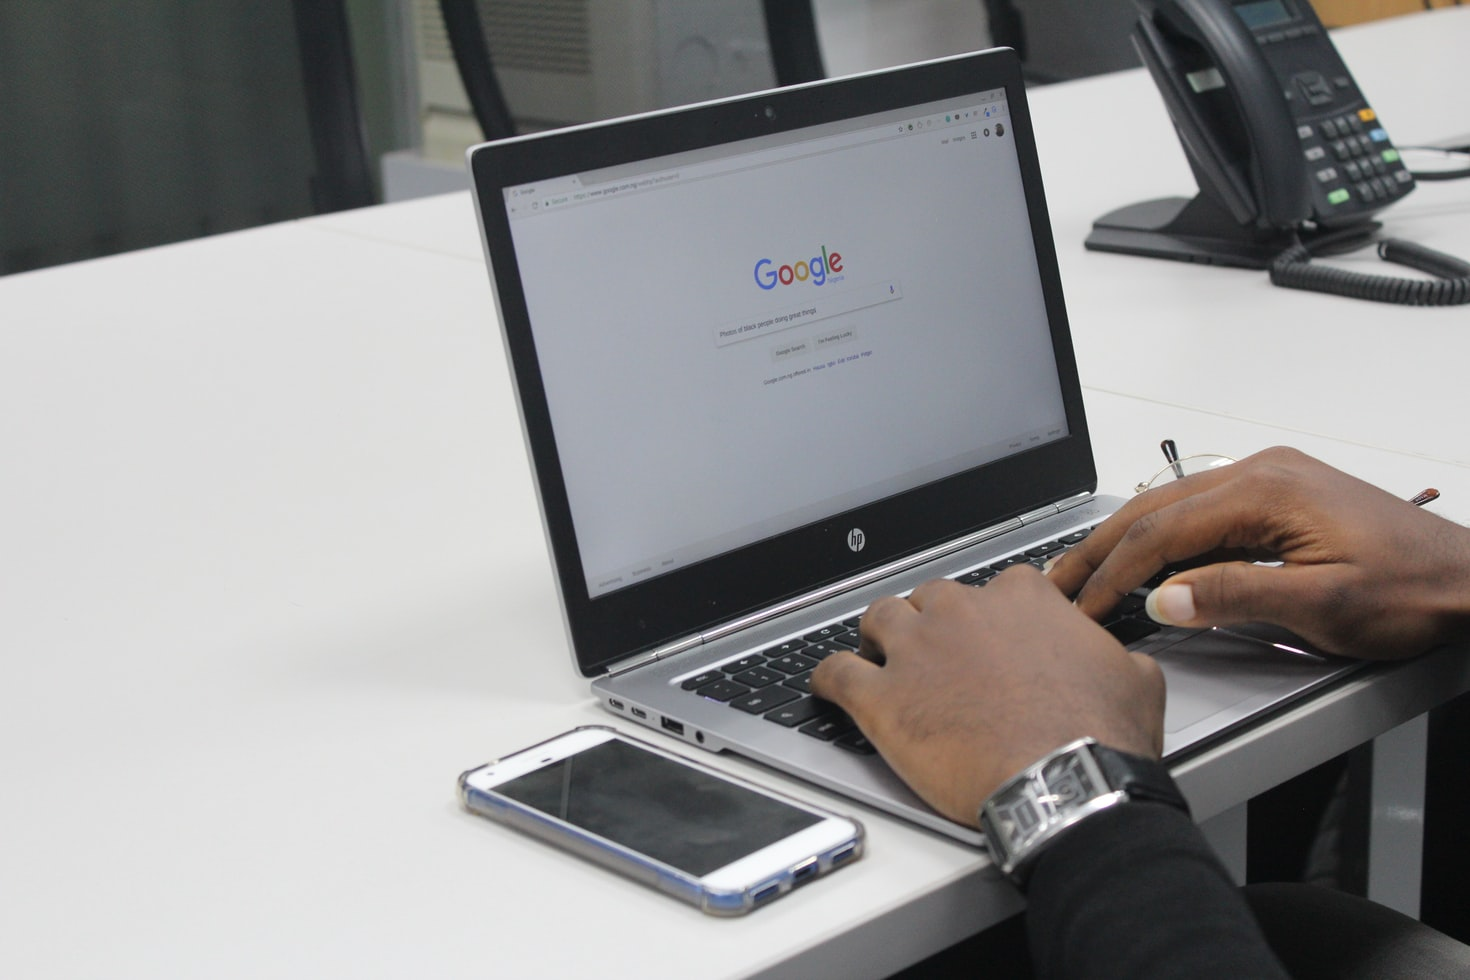
Photo by <a href="https://unsplash.com/@dadaben_?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Benjamin Dada</a> on <a href="https://unsplash.com/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

In [ ]:
job_ng = nigeria["Q5"].value_counts(normalize=True, ascending=True) 
job_ng = job_ng.mul(100)
job_ng = job_ng.round(decimals=1)
job_ng = pd.DataFrame(data=job_ng)
job_ng.reset_index(inplace=True)
job_ng.columns = ["role","percentage (%)"] 

fig = px.bar(job_ng, y="role", x="percentage (%)", text='percentage (%)', 
             title="Job roles of Nigerian Kagglers", orientation = "h")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color=colors_ng, ) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.show()

In [ ]:
job_rotw = rest_of_the_world["Q5"].value_counts(normalize=True, ascending=True) 
job_rotw = job_rotw.mul(100)
job_rotw = job_rotw.round(decimals=1)
job_rotw = pd.DataFrame(data=job_rotw)
job_rotw.reset_index(inplace=True)
job_rotw.columns = ["role","percentage (%)"] 

fig = px.bar(job_rotw, y="role", x="percentage (%)", text='percentage (%)',
            title="Job roles for the rest of the world", orientation = "h")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color=colors_rotw,) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.show()

* Most Nigerian Kagglers are **Students**, **Data Analysts** and **Data Scientists**.

* Similar to the  rest of the world, **Students** form the majority of Nigerian Kagglers.

* Apart from students, the **job titles** for most Nigerian Kagglers are **Data Analysts**, **Data Scientists** and **Software Engineers**. 


# Age distribution of Nigerian Kagglers 

In [ ]:
age_ng = nigeria["Q1"].value_counts(normalize=True) 
age_ng = age_ng.mul(100)
age_ng = age_ng.round(decimals=1)
age_ng = pd.DataFrame(data=age_ng)
age_ng.reset_index(inplace=True)
age_ng.columns = ["age","percentage (%)"] 
age_ng.sort_values(by="age", inplace=True)


fig = px.bar(age_ng, x="age", y="percentage (%)", text='percentage (%)', 
             title="Age of Nigerian Kagglers")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color=colors_ng, ) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")

fig.show()

In [ ]:
age_rotw = rest_of_the_world["Q1"].value_counts(normalize=True) 
age_rotw = age_rotw.mul(100)
age_rotw = age_rotw.round(decimals=1)
age_rotw = pd.DataFrame(data=age_rotw)
age_rotw.reset_index(inplace=True)
age_rotw.columns = ["age","percentage (%)"] 
age_rotw.sort_values(by="age", inplace=True)


fig = px.bar(age_rotw, x="age", y="percentage (%)", text='percentage (%)', 
             title="Age range for the rest of the world") 
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside', marker_color=colors_rotw, ) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.show()

* The **largest proportion (30%)** of Nigerian Kagglers are in the age range of **25 - 29**. 

* About **65% of Nigerian Kagglers** are within the age of **22 - 34**.

* **91%** of Nigerian Kagglers are **younger** than **40**. 

* Look at the rest of the world in general, the higher the age, the lower the proportion/percentage. 

* The **largest proportion (19%)** for the **rest of the world** falls between **18 and 21**.

* In general, Kagglers worldwide are **relatively young**. 

# Education Level of Nigerian Kagglers

In [ ]:
education_ng = nigeria["Q4"].value_counts(normalize=True) 
education_ng = education_ng.mul(100)
education_ng = education_ng.round(decimals=1)
education_ng = pd.DataFrame(data=education_ng)
education_ng.reset_index(inplace=True)
education_ng.columns = ["education", "percentage (%)"]

education_order = ["No formal education past high school", 
                             "Some college/university study without earning a bachelor’s degree",
"Bachelor’s degree", "Master’s degree", "Doctoral degree", "Professional doctorate", "I prefer not to answer"]

education_ng["education"] = pd.Categorical(education_ng["education"], categories=education_order)

education_ng.sort_values(by="education", inplace=True)

labels_ng = education_ng['education']
values_ng = education_ng["percentage (%)"]



fig = px.bar(education_ng, x="education", y="percentage (%)", text='percentage (%)', 
             title="Highest formal education of Nigerian Kagglers")
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto', marker_color=colors_ng) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")

fig.show()



In [ ]:
education_rotw = rest_of_the_world["Q4"].value_counts(normalize=True) 
education_rotw  = education_rotw .mul(100)
education_rotw  = education_rotw .round(decimals=1)
education_rotw  = pd.DataFrame(data=education_rotw )
education_rotw .reset_index(inplace=True)
education_rotw.columns = ["education", "percentage (%)"]

education_order = ["No formal education past high school", 
                             "Some college/university study without earning a bachelor’s degree",
"Bachelor’s degree", "Master’s degree", "Doctoral degree", "Professional doctorate", "I prefer not to answer"]

education_rotw["education"] = pd.Categorical(education_rotw["education"], categories=education_order)

education_rotw.sort_values(by="education", inplace=True)


labels_rotw = education_rotw['education']
values_rotw = education_rotw["percentage (%)"]


fig = px.bar(education_rotw, x="education", y="percentage (%)", text='percentage (%)', 
             title="Highest formal education for the rest of the world")
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto', marker_color=colors_rotw) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")

fig.show()

* The most common education level for Nigerian Kagglers is a **Bachelor's degree (52%)**. 

* About **93% of Nigerian Kagglers** have at least a **Bachelor's degree**.

* This is slightly **higher** than the rest of the world of **89%**.

# Industry of Nigeria Kagglers

In [ ]:
industry_ng = nigeria["Q20"].value_counts(normalize=True, ascending=True) 
industry_ng = industry_ng.mul(100)
industry_ng = industry_ng.round(decimals=1)
industry_ng = pd.DataFrame(data=industry_ng)
industry_ng.reset_index(inplace=True)
industry_ng.columns = ["industry","percentage (%)"] 

fig = px.bar(industry_ng, y="industry", x="percentage (%)", text='percentage (%)', 
             title="Industry of Nigerian Kagglers", orientation = "h")
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto', marker_color=colors_ng, ) 
fig.update_layout(uniformtext_minsize=8, plot_bgcolor = "white")
fig.show()

In [ ]:
industry_rotw = rest_of_the_world["Q20"].value_counts(normalize=True, ascending=True) 
industry_rotw = industry_rotw.mul(100)
industry_rotw = industry_rotw.round(decimals=1)
industry_rotw = pd.DataFrame(data=industry_rotw)
industry_rotw.reset_index(inplace=True)
industry_rotw.columns = ["industry","percentage (%)"] 

fig = px.bar(industry_rotw, y="industry", x="percentage (%)", text='percentage (%)', 
             title="Industry of other Kagglers (rest of the world)", orientation = "h")
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto', marker_color=colors_rotw) 
fig.update_layout(uniformtext_minsize=8, plot_bgcolor = "white")

#fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.show()

* Most Nigeria Kagglers work in the following sectors - **Academics/Education**, **Computers/Technology**, and **Accounting/Finance**.
    
* These industries are also in line with the rest of the world, however, Computers/Technology ranks as number one in the rest of the world.

# How much do Nigerian Kagglers earn?

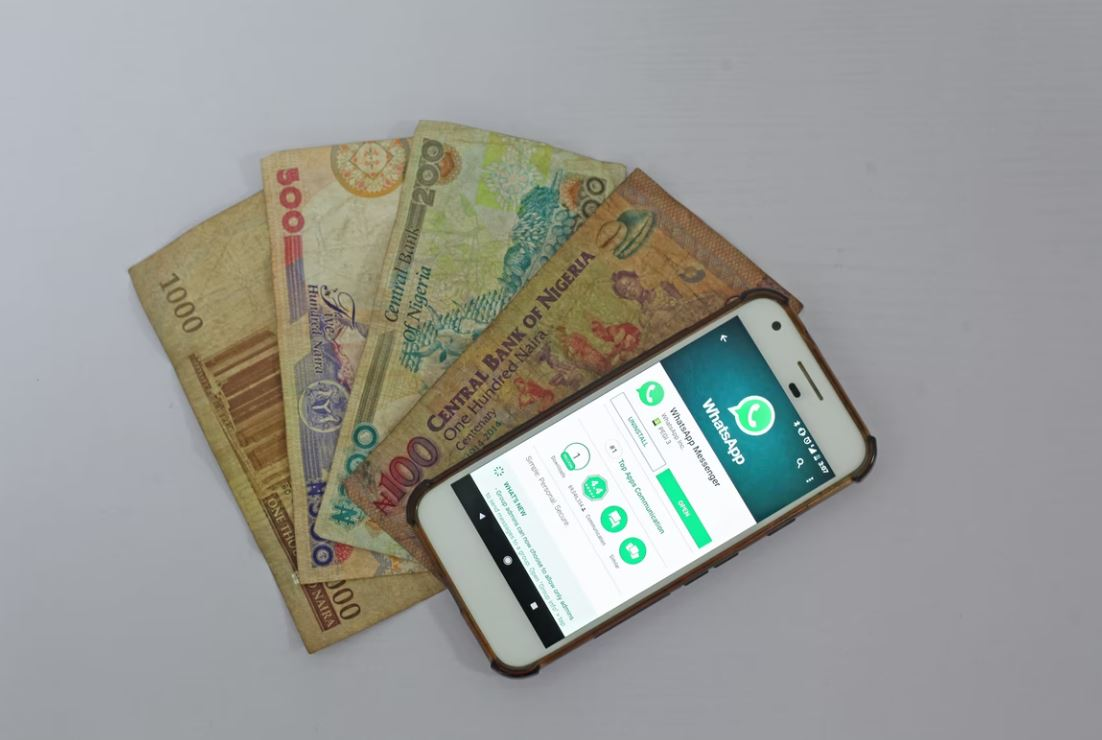
Photo by <a href="https://unsplash.com/@dadaben_?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Benjamin Dada</a> on <a href="https://unsplash.com/@dadaben_?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

In [ ]:
salary_ng = nigeria["Q25"].value_counts(normalize=True) 
salary_ng = salary_ng.mul(100)
salary_ng = salary_ng.round(decimals=1)
salary_ng = pd.DataFrame(data=salary_ng)
salary_ng.reset_index(inplace=True)
salary_ng.columns = ["salary","percentage (%)"] 

salary_order = ["$0-999", "1,000-1,999", "2,000-2,999", "3,000-3,999", "4,000-4,999", "5,000-7,499",
               "7,500-9,999", "10,000-14,999", "15,000-19,999", "20,000-24,999", "25,000-29,999",
                "30,000-39,999", "40,000-49,999", "50,000-59,999", "60,000-69,999", "70,000-79,999",
                "80,000-89,999", "90,000-99,999", "100,000-124,999", "150,000-199,999", "200,000-249,999",
                ">$1,000,000"]

salary_ng["salary"] = pd.Categorical(salary_ng["salary"], categories=salary_order)
salary_ng.sort_values(by="salary", inplace=True)

fig = px.bar(salary_ng, x="salary", y="percentage (%)", text='percentage (%)', 
             title="Annual salary of Nigerian Kagglers")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color=colors_ng) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.show()

## Breakdown of annual salary for the top three (3) professions of Nigerian Kagglers

* Considering that the annual salary above takes into consideration all the job roles (including students), let's investigate the salary distribution across the three main job titles (Data Analyst, Data Scientist and Software Engineer).

## Annual salary of Nigerian Kagglers that are Data Analysts

In [ ]:
nigeria_data_analyst = nigeria[nigeria["Q5"]=="Data Analyst"] #fi;ter Nigerian Kagglers that are Data Analysts

nigeria_data_analyst = nigeria_data_analyst["Q25"].value_counts(normalize=True) 
nigeria_data_analyst = nigeria_data_analyst.mul(100)
nigeria_data_analyst = nigeria_data_analyst.round(decimals=1)
nigeria_data_analyst = pd.DataFrame(data=nigeria_data_analyst)
nigeria_data_analyst.reset_index(inplace=True)
nigeria_data_analyst.columns = ["salary","percentage (%)"] 

salary_order = ["$0-999", "1,000-1,999", "2,000-2,999", "3,000-3,999", "4,000-4,999", "5,000-7,499",
              "7,500-9,999", "10,000-14,999", "15,000-19,999", "20,000-24,999", "25,000-29,999",
               "30,000-39,999", "40,000-49,999", "50,000-59,999", "60,000-69,999", "70,000-79,999",
                "80,000-89,999", "90,000-99,999", "100,000-124,999", "150,000-199,999", "200,000-249,999",
               ">$1,000,000"]

nigeria_data_analyst["salary"] = pd.Categorical(nigeria_data_analyst["salary"], categories=salary_order)
nigeria_data_analyst.sort_values(by="salary", inplace=True)

fig = px.bar(nigeria_data_analyst, x="salary", y="percentage (%)", text='percentage (%)', 
             title="Annual salary of Nigerian Kagglers that are Data Analysts")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color=colors_ng, ) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.show()

## Annual salary of Nigerian Kagglers that are Data Scientists

In [ ]:
nigeria_data_scientist = nigeria[nigeria["Q5"]=="Data Scientist"]


nigeria_data_scientist = nigeria_data_scientist["Q25"].value_counts(normalize=True) 
nigeria_data_scientist = nigeria_data_scientist.mul(100)
nigeria_data_scientist = nigeria_data_scientist.round(decimals=1)
nigeria_data_scientist = pd.DataFrame(data=nigeria_data_scientist)
nigeria_data_scientist.reset_index(inplace=True)
nigeria_data_scientist.columns = ["salary","percentage (%)"] 

salary_order = ["$0-999", "1,000-1,999", "2,000-2,999", "3,000-3,999", "4,000-4,999", "5,000-7,499",
              "7,500-9,999", "10,000-14,999", "15,000-19,999", "20,000-24,999", "25,000-29,999",
                "30,000-39,999", "40,000-49,999", "50,000-59,999", "60,000-69,999", "70,000-79,999",
                "80,000-89,999", "90,000-99,999", "100,000-124,999", "150,000-199,999", "200,000-249,999",
               ">$1,000,000"]

nigeria_data_scientist["salary"] = pd.Categorical(nigeria_data_scientist["salary"], categories=salary_order)
nigeria_data_scientist.sort_values(by="salary", inplace=True)

fig = px.bar(nigeria_data_scientist, x="salary", y="percentage (%)", text='percentage (%)', 
             title="Annual salary of Nigerian Kagglers that are Data Scientists")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color=colors_ng, ) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.show()

##  Annual salary of Nigerian Kagglers that are Software Engineers

In [ ]:
nigeria_software_engineer = nigeria[nigeria["Q5"]=="Software Engineer"]

nigeria_software_engineer = nigeria_software_engineer["Q25"].value_counts(normalize=True) 
nigeria_software_engineer = nigeria_software_engineer.mul(100)
nigeria_software_engineer = nigeria_software_engineer.round(decimals=1)
nigeria_software_engineer = pd.DataFrame(data=nigeria_software_engineer)
nigeria_software_engineer.reset_index(inplace=True)
nigeria_software_engineer.columns = ["salary","percentage (%)"] 

salary_order = ["$0-999", "1,000-1,999", "2,000-2,999", "3,000-3,999", "4,000-4,999", "5,000-7,499",
               "7,500-9,999", "10,000-14,999", "15,000-19,999", "20,000-24,999", "25,000-29,999",
                "30,000-39,999", "40,000-49,999", "50,000-59,999", "60,000-69,999", "70,000-79,999",
               "80,000-89,999", "90,000-99,999", "100,000-124,999", "150,000-199,999", "200,000-249,999",
                ">$1,000,000"]

nigeria_software_engineer["salary"] = pd.Categorical(nigeria_software_engineer["salary"], categories=salary_order)
nigeria_software_engineer.sort_values(by="salary", inplace=True)

fig = px.bar(nigeria_software_engineer, x="salary", y="percentage (%)", text='percentage (%)', 
             title="Annual salary of Nigerian Kagglers that are Software Engineers")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color=colors_ng, ) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.show()

In [ ]:
salary_rotw = rest_of_the_world["Q25"].value_counts(normalize=True) 
salary_rotw = salary_rotw.mul(100)
salary_rotw = salary_rotw.round(decimals=1)
salary_rotw = pd.DataFrame(data=salary_rotw)
salary_rotw.reset_index(inplace=True)
salary_rotw.columns = ["salary","percentage (%)"] 

salary_order = ["$0-999", "1,000-1,999", "2,000-2,999", "3,000-3,999", "4,000-4,999", "5,000-7,499",
               "7,500-9,999", "10,000-14,999", "15,000-19,999", "20,000-24,999", "25,000-29,999",
                "30,000-39,999", "40,000-49,999", "50,000-59,999", "60,000-69,999", "70,000-79,999",
                "80,000-89,999", "90,000-99,999", "100,000-124,999", "150,000-199,999", "200,000-249,999",
                ">$1,000,000"]

salary_rotw["salary"] = pd.Categorical(salary_rotw["salary"], categories=salary_order)
salary_rotw.sort_values(by="salary", inplace=True)


fig = px.bar(salary_rotw, x="salary", y="percentage (%)", text='percentage (%)', 
             title="Annual salary for the rest of the world")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color=colors_rotw, ) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.show()

* Almost half of Nigerian Kagglers (45 percent) **earn less than $1,000 per year**.

* About **60% of Nigerians** earn less than $2,000 per year.

* On the other hand, only about 20% of people from other nationalities earn under $1,000. *Further analysis on the respective living wage and purchasing power for each country will give a more comprehensive overview*.

* In general, the salary distribution for **Data Analysts, Data Scientists and Software Engineers (Nigerian Kagglers)** are similar and mainly earn **less than $3,000 per year**.

* A minor point is that there are more Software Engineers from the Nigerian Kaggle community who earn more (66 percent) than 1,000 USD per year compared to those that earn less (34 percent) than 1,000 USD per year.

# Programming 

# How long have Nigerian Kagglers been programming?

In [ ]:
prog_years_ng = nigeria["Q6"].value_counts(normalize=True)
prog_years_ng = prog_years_ng.mul(100)
prog_years_ng = prog_years_ng.round(decimals=1)
prog_years_ng = pd.DataFrame(data=prog_years_ng)
prog_years_ng.reset_index(inplace=True)
prog_years_ng.columns = ["years", "percentage (%)"]


prog_years_order = ["I have never written code", "< 1 years", "1-3 years", "3-5 years", "5-10 years",
                   "10-20 years", "20+ years"]


prog_years_ng["years"] = pd.Categorical(prog_years_ng["years"], categories=prog_years_order)
prog_years_ng.sort_values(by="years", inplace=True)


fig = px.bar(prog_years_ng, x="years", y="percentage (%)", text='percentage (%)', 
             title="Years of programming for Nigerian Kagglers")
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto', marker_color=colors_ng) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.update_xaxes(tickangle=45)
fig.show()


* Most **Nigerian Kagglers (72%)** have less than **3 years of programming experience**.

* **7%** of Nigerian Kagglers have never written code.

* Only about **9% of Nigerian Kagglers** have over **5 years** of programming experience.

In [ ]:
prog_years_rotw = rest_of_the_world["Q6"].value_counts(normalize=True)
prog_years_rotw = prog_years_rotw.mul(100)
prog_years_rotw = prog_years_rotw.round(decimals=1)
prog_years_rotw = pd.DataFrame(data=prog_years_rotw)
prog_years_rotw.reset_index(inplace=True)
prog_years_rotw.columns = ["years", "percentage (%)"]

prog_years_order = ["I have never written code", "< 1 years", "1-3 years", "3-5 years", "5-10 years",
                   "10-20 years", "20+ years"]

prog_years_rotw["years"] = pd.Categorical(prog_years_rotw["years"], categories=prog_years_order)
prog_years_rotw.sort_values(by="years", inplace=True)



fig = px.bar(prog_years_rotw, x="years", y="percentage (%)", text='percentage (%)', 
             title="Years of programming for the rest of the world")
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto', marker_color=colors_rotw, ) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.update_xaxes(tickangle=45)

fig.show()

# What programming languages do Nigerian Kagglers use?

In [ ]:
prog_lang_ng = pd.DataFrame(nigeria.loc[:,list(nigeria.columns[7:20])].count(), columns=["count"])
prog_lang_ng["programming language"] = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 
                'Javascript', 'Julia', 'Swift','Bash', 'MATLAB', 'None', 'Other']
prog_lang_ng.sort_values(by = "count", inplace = True, ascending = False)

prog_lang_ng["percentage (%)"] = (prog_lang_ng["count"]/
                              prog_lang_ng["count"].sum()) * 100  

prog_lang_ng = prog_lang_ng.round(decimals=1)

fig = go.Figure(go.Treemap(
    labels = prog_lang_ng["programming language"],
    values = prog_lang_ng["percentage (%)"],
    parents = ['']*prog_lang_ng.shape[0], textinfo = "percent root+label+text", marker=dict(
        
        colorscale='greens',
        )
))

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', 
                  title= "Programming language regularly used by Nigerian Kagglers") 
fig.show()


* The **top programming language** for Nigerian Kagglers is **Python**, which is similar to the rest of the world. 

* Most Nigerian Kagglers use **Python, SQL and Javascript**.

* Javascript ranks third compared to C++ which ranks third for the rest of the world. 

In [ ]:
prog_lang_rotw = pd.DataFrame(rest_of_the_world.loc[:,list(rest_of_the_world.columns[7:20])].count(), columns=["count"])
prog_lang_rotw["programming language"] = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 
                'Javascript', 'Julia', 'Swift','Bash', 'MATLAB', 'None', 'Other']
prog_lang_rotw.sort_values(by = "count", inplace = True, ascending = False)

prog_lang_rotw["percentage (%)"] = (prog_lang_rotw["count"]/
                              prog_lang_rotw["count"].sum()) * 100  

prog_lang_rotw = prog_lang_rotw.round(decimals=1)

fig = go.Figure(go.Treemap(
    labels = prog_lang_rotw["programming language"],
    values = prog_lang_rotw["percentage (%)"],
    parents = ['']*prog_lang_rotw.shape[0], textinfo = "percent root+label+text", marker=dict(
        
        colorscale='ylorbr',
        )
))

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', 
                  title= "Programming language regularly used by the rest of the world") 
fig.show()


# Integrated development environment (IDE) used by Nigerian Kagglers

In [ ]:
ide_ng = pd.DataFrame(nigeria.loc[:,list(nigeria.columns[21:34])].count(), columns=["count"])
ide_ng["IDE"] = ['Jupyter', 'Rstudio', 'Visual Studio', 'VScode', 
                     'PyCharm', 'Spyder', 'Notepad++', 'Sublime Text', 'Vim/Emacs','MATLAB', 
                     'Jupyter Notebook', 'None', 'Other']

ide_ng.sort_values(by = "count", inplace = True, ascending = False)

ide_ng["percentage (%)"] = (ide_ng["count"]/
                              ide_ng["count"].sum()) * 100  

ide_ng = ide_ng.round(decimals=1)

fig = px.bar(ide_ng, x="IDE", y="percentage (%)", text='percentage (%)', 
             title="IDES used by Nigerian Kagglers")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color=colors_ng) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.show()

In [ ]:
ide_rotw = pd.DataFrame(rest_of_the_world.loc[:,list(rest_of_the_world.columns[21:34])].count(), columns=["count"])
ide_rotw["IDE"] = ['Jupyter', 'Rstudio', 'Visual Studio', 'VScode', 
                     'PyCharm', 'Spyder', 'Notepad++', 'Sublime Text', 'Vim/Emacs','MATLAB', 
                     'Jupyter Notebook', 'None', 'Other']

ide_rotw.sort_values(by = "count", inplace = True, ascending = False)

ide_rotw["percentage (%)"] = (ide_rotw["count"]/
                              ide_rotw["count"].sum()) * 100  

ide_rotw = ide_rotw.round(decimals=1)

fig = px.bar(ide_rotw, x="IDE", y="percentage (%)", text='percentage (%)', 
             title="IDES used by the rest of the world")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color=colors_rotw) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.show()

* **Jupyter Notebook** is the **most popular IDE** among Nigerian Kagglers and the rest of the world.

* Similarly, the three most popular IDEs among Nigerian Kagglers and the rest of the world are **Jupyter Notebook, VScode and PyCharm**.

# Machine Learning

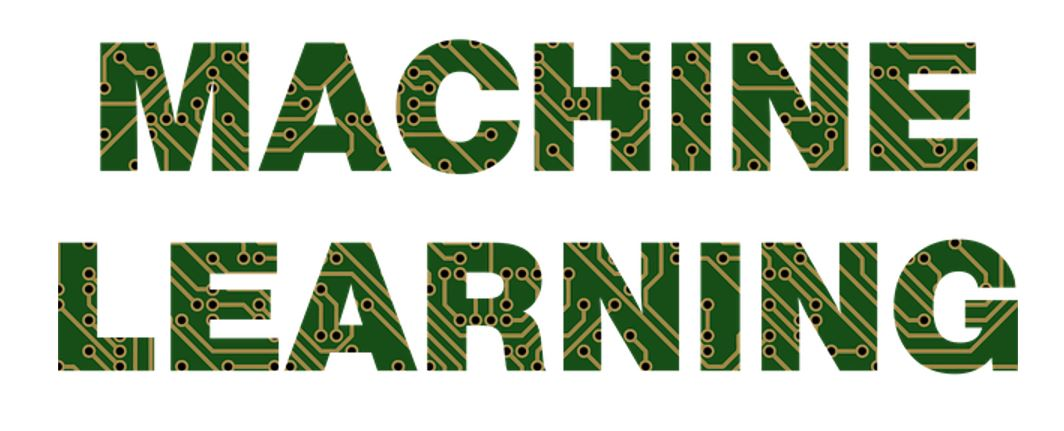

# How long have Nigerian Kagglers been using Machine Learning methods?

In [ ]:
ml_ng = nigeria["Q15"].value_counts(normalize=True)
ml_ng = ml_ng.mul(100)
ml_ng = ml_ng.round(decimals=1)
ml_ng = pd.DataFrame(data=ml_ng)
ml_ng.reset_index(inplace=True)
ml_ng.columns = ["years", "percentage (%)"]

ml_years_order = ["I do not use machine learning methods", "Under 1 year", "1-2 years", "2-3 years", "3-4 years",
                  "4-5 years","5-10 years", "10-20 years"]

ml_ng["years"] = pd.Categorical(ml_ng["years"], categories=ml_years_order)
ml_ng.sort_values(by="years", inplace=True)



fig = px.bar(ml_ng, x="years", y="percentage (%)", text='percentage (%)', 
             title="Years of using Machine Learning methods (Nigerian Kagglers)")
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto', marker_color=colors_ng) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.update_xaxes(tickangle=45)

fig.show()

* **70%** of Nigerian Kagglers have been applying **Machine Learning methods** for under **two years**.

* **20%** of Nigerian Kagglers do use Machine Learning methods.

In [ ]:
ml_rotw = rest_of_the_world["Q15"].value_counts(normalize=True)
ml_rotw = ml_rotw.mul(100)
ml_rotw = ml_rotw.round(decimals=1)
ml_rotw = pd.DataFrame(data=ml_rotw)
ml_rotw.reset_index(inplace=True)
ml_rotw.columns = ["years", "percentage (%)"]

ml_years_order = ["I do not use machine learning methods", "Under 1 year", "1-2 years", "2-3 years", "3-4 years",
                  "4-5 years","5-10 years", "10-20 years"]

ml_rotw["years"] = pd.Categorical(ml_rotw["years"], categories=ml_years_order)
ml_rotw.sort_values(by="years", inplace=True)



fig = px.bar(ml_rotw, x="years", y="percentage (%)", text='percentage (%)', 
             title="Years of using Machine Learning methods (rest of the world)")
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto', marker_color=colors_rotw) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.update_xaxes(tickangle=45)

fig.show()

# Machine Learning frameworks used by Nigerian Kagglers 

In [ ]:
ml_framework_ng = pd.DataFrame(nigeria.loc[:,list(nigeria.columns[72:90])].count(), columns=["count"])
ml_framework_ng["ml_framework"] = ['Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'Fast.ai',
       'MXNet', 'Xgboost', 'LightGBM', 'CatBoost', 'Prophet', "H2O 3", "Caret", "Tidymodels", "JAX",
                                "PyTorch Lightning", "Huggingface", 'None', 'Other']

ml_framework_ng.sort_values(by = "count", inplace = True, ascending = True)

ml_framework_ng["percentage (%)"] = (ml_framework_ng["count"]/
                              ml_framework_ng["count"].sum()) * 100  

ml_framework_ng = ml_framework_ng.round(decimals=1)

fig = px.bar(ml_framework_ng, y="ml_framework", x="percentage (%)", text='percentage (%)', 
             title="Machine Learning frameworks regularly used by Nigerian Kagglers", orientation = "h")
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto', marker_color=colors_ng) 
fig.update_layout(uniformtext_minsize=8, plot_bgcolor = "white")
fig.show()

* **Scikit-learn**, **TensorFlow** and **Keras** are most popular Machine Learning frameworks used regularly by Nigerian Kagglers, this is also the same with the rest of the world.

In [ ]:
ml_framework_rotw = pd.DataFrame(rest_of_the_world.loc[:,list(rest_of_the_world.columns[72:90])].count(), 
                                 columns=["count"])
ml_framework_rotw["ml_framework"] = ['Scikit-learn', 'TensorFlow', 'Keras', 'PyTorch', 'Fast.ai',
       'MXNet', 'Xgboost', 'LightGBM', 'CatBoost', 'Prophet', "H2O 3", "Caret", "Tidymodels", "JAX",
                                "PyTorch Lightning", "Huggingface", 'None', 'Other']

ml_framework_rotw.sort_values(by = "count", inplace = True, ascending = True)

ml_framework_rotw["percentage (%)"] = (ml_framework_rotw["count"]/
                              ml_framework_rotw["count"].sum()) * 100  

ml_framework_rotw = ml_framework_rotw.round(decimals=1)

fig = px.bar(ml_framework_rotw, y="ml_framework", x="percentage (%)", text='percentage (%)', 
             title="Machine Learning frameworks regularly used by the rest of the world", orientation = "h")
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto', marker_color=colors_rotw) 
fig.update_layout(uniformtext_minsize=8, plot_bgcolor = "white")
fig.show()

# Machine Learning algorithms used by Nigerian Kagglers

In [ ]:
ml_algorithm_ng = pd.DataFrame(nigeria.loc[:,list(nigeria.columns[90:102])].count(), columns=["count"])
ml_algorithm_ng["ml_algorithm"] = ['Linear or Logistic Regression', 'Decision Trees or Random Forests', 
                                 'Gradient Boosting Machines (xgboost, lightgbm, etc)', 
                                 'Bayesian Approaches', 'Evolutionary Approaches',
                                 'Dense Neural Networks (MLPs, etc)', 
                                 'Convolutional Neural Networks', 'Generative Adversarial Networks', 
                                 'Recurrent Neural Networks', 'Transformer Networks (BERT, gpt-3, etc)', 
       'None', 'Other']

ml_algorithm_ng.sort_values(by = "count", inplace = True, ascending = False)

ml_algorithm_ng["percentage (%)"] = (ml_algorithm_ng["count"]/
                              ml_algorithm_ng["count"].sum()) * 100  

ml_algorithm_ng = ml_algorithm_ng.round(decimals=1)

fig = px.bar(ml_algorithm_ng, x="ml_algorithm", y="percentage (%)", text='percentage (%)', 
             title="Machine Learning algorithms used regularly by Nigerian Kagglers")
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto', marker_color=colors_ng) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.show()

* **Linear/Logistic Regression**, **Decision Trees/Random Forests** and **Gradient Boosting Machines(XGBoost, lightgbm, etc)** are the most popular Machine Learning algorithms used regularly by Nigerian Kagglers, this is also the same with the rest of the world. 

In [ ]:
ml_algorithm_rotw = pd.DataFrame(rest_of_the_world.loc[:,list(rest_of_the_world.columns[90:102])].count(), 
                                 columns=["count"])
ml_algorithm_rotw["ml_algorithm"] = ['Linear or Logistic Regression', 'Decision Trees or Random Forests', 
                                 'Gradient Boosting Machines (xgboost, lightgbm, etc)', 
                                 'Bayesian Approaches', 'Evolutionary Approaches',
                                 'Dense Neural Networks (MLPs, etc)', 
                                 'Convolutional Neural Networks', 'Generative Adversarial Networks', 
                                 'Recurrent Neural Networks', 'Transformer Networks (BERT, gpt-3, etc)', 
       'None', 'Other']

ml_algorithm_rotw.sort_values(by = "count", inplace = True, ascending = False)

ml_algorithm_rotw["percentage (%)"] = (ml_algorithm_rotw["count"]/
                              ml_algorithm_rotw["count"].sum()) * 100  

ml_algorithm_rotw = ml_algorithm_rotw.round(decimals=1)

fig = px.bar(ml_algorithm_rotw, x="ml_algorithm", y="percentage (%)", text='percentage (%)', 
             title="Machine Learning algorithms used regularly by the rest of the world")
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto', marker_color=colors_rotw) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")
fig.show()

# Database used by Nigerian Kagglers

In [ ]:
database_ng = pd.DataFrame(nigeria.loc[:,list(nigeria.columns[165:186])].count(), columns=["count"])
database_ng["database"] = ['MySQL', 'PostgreSQL', 'SQLite', 
                                 'Oracle Database', 'MongoDB',
                                 'Snowflake', 'IBM Db2', 'Microsoft SQL Server', 
                                 'Microsoft Azure SQL Database', 'Microsoft Azure Cosmos DB',
                         "Amazon Redshift", "Amazon Aurora", "Amazon RDS", "Amazon DynamoDB",
                         "Google Cloud BigQuery", "Google Cloud SQL", "Google Cloud Firestore",
                         "Google Cloud BigTable", "Google Cloud Spanner",
       'None', 'Other']

database_ng.sort_values(by = "count", inplace = True, ascending = True)

database_ng["percentage (%)"] = (database_ng["count"]/
                              database_ng["count"].sum()) * 100  

database_ng = database_ng.round(decimals=1)

fig = px.bar(database_ng, y="database", x="percentage (%)", text='percentage (%)', 
             title="Database used by Nigerian Kagglers", orientation="h")
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto', marker_color=colors_ng) 
fig.update_layout(uniformtext_minsize=8, plot_bgcolor = "white")
fig.show()

In [ ]:
database_rotw = pd.DataFrame(rest_of_the_world.loc[:,list(rest_of_the_world.columns[165:186])].count(), columns=["count"])
database_rotw["database"] = ['MySQL', 'PostgreSQL', 'SQLite', 
                                 'Oracle Database', 'MongoDB',
                                 'Snowflake', 'IBM Db2', 'Microsoft SQL Server', 
                                 'Microsoft Azure SQL Database', 'Microsoft Azure Cosmos DB',
                         "Amazon Redshift", "Amazon Aurora", "Amazon RDS", "Amazon DynamoDB",
                         "Google Cloud BigQuery", "Google Cloud SQL", "Google Cloud Firestore",
                         "Google Cloud BigTable", "Google Cloud Spanner",
       'None', 'Other']

database_rotw.sort_values(by = "count", inplace = True, ascending = True)

database_rotw["percentage (%)"] = (database_rotw["count"]/
                              database_rotw["count"].sum()) * 100  

database_rotw = database_rotw.round(decimals=1)

fig = px.bar(database_rotw, y="database", x="percentage (%)", text='percentage (%)', 
             title="Database used by the rest of the world", orientation="h")
fig.update_traces(texttemplate='%{text:.2s}', textposition='auto', marker_color=colors_rotw) 
fig.update_layout(uniformtext_minsize=8, plot_bgcolor = "white")
fig.show()

* The most common databases used by Nigerian Kagglers are **MySQL**, **PostgreSQL**, and **Microsoft SQL Server**. This is similar to the rest of the world. 

# Favourite media source on data science topics

In [ ]:
media_source_ng = pd.DataFrame(nigeria.loc[:,list(nigeria.columns[256:268])].count(), columns=["count"])
media_source_ng["media_source"] = ['Twitter', 'Email newsletters', 'Reddit', 'Kaggle', 'Course Forums',
       'YouTube', 'Podcasts', 'Blogs', 'Journal Publications', 'Slack Communities',
       'None', 'Other']

media_source_ng.sort_values(by = "count", inplace = True, ascending = False)

media_source_ng["percentage (%)"] = (media_source_ng["count"]/
                              media_source_ng["count"].sum()) * 100  

media_source_ng = media_source_ng.round(decimals=1)

fig = go.Figure(go.Treemap(
    labels = media_source_ng["media_source"],
    values = media_source_ng["percentage (%)"] ,
    parents = ['']*media_source_ng.shape[0], textinfo = "percent root+label+text", marker=dict(
        
        colorscale='greens',
        )
))

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', 
                  title= "Favourite media source on data science topics for Nigerian Kagglers") 
fig.show()

In [ ]:
media_source_rotw = pd.DataFrame(rest_of_the_world.loc[:,list(rest_of_the_world.columns[256:268])].count(), 
                                 columns=["count"])
media_source_rotw["media_source"] = ['Twitter', 'Email newsletters', 'Reddit', 'Kaggle', 'Course Forums',
       'YouTube', 'Podcasts', 'Blogs', 'Journal Publications', 'Slack Communities',
       'None', 'Other']

media_source_rotw.sort_values(by = "count", inplace = True, ascending = False)

media_source_rotw["percentage (%)"] = (media_source_rotw["count"]/
                              media_source_rotw["count"].sum()) * 100  

media_source_rotw = media_source_rotw.round(decimals=1)

fig = go.Figure(go.Treemap(
    labels = media_source_rotw["media_source"],
    values = media_source_rotw["percentage (%)"] ,
    parents = ['']*media_source_rotw.shape[0], textinfo = "percent root+label+text", marker=dict(
        
        colorscale='ylorbr',
        )
))

fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', 
                  title= "Favourite media source on data science topics for the rest of the world") 
fig.show()

* The top **three** favourite media sources on data science topics by Nigerian Kagglers are **Kaggle**, **YouTube**  and **Blogs**.

# **Concluding Remarks**

This notebook covers the analysis of a unique and specific subset of the dataset, i.e., Nigerian Kagglers, represented in the 2021 Kaggle Machine Learning & Data Science Survey. Some interesting questions were posed around Nigerian Kagglers, which were answered with some data exploration, narrative texts and visualisations. 

A summary of the concluding remarks are shown below:

•	In comparison to **64 countries**, **Nigeria Kagglers make up about 2.7%** and is **ranked 7th**.

•	There has been **steady growth** over the past five years, and the total number of responses for the 2021 Kaggle Survey from **Nigeria was 702**. Also, this number for **2021** is about **10 times greater** than in **2017**. A regression model shows that the number will approach and **exceed 1,000 in two-three years**.

•	Within Africa, **Nigeria Kagglers** made up 34% and **ranked number one**. Furthermore, the top three African countries on Kaggle are **Nigeria, Egypt and Kenya**. However, ranking of the African countries **per ten million population** shows that **Nigeria** is **ranked 5th**.


•	The analysis of **gender distribution** shows that 1**5% of Nigerian Kagglers are women and 85% are men**. This reflects a **significant gender gap** among Nigerian Kagglers. 

•	Apart from students, most Nigerian Kagglers are **Data Analysts, Data Scientists and Software Engineers**.

•	The **largest proportion (30%)** of Nigerian Kagglers are in the age range of **25 - 29**. Also, **91%** of Nigerian Kagglers are **younger than 40**. This shows that most Nigerian Kagglers are reasonably young. 

•	The most common education level for Nigerian Kagglers is a **Bachelor's degree (52%)**. About **93% have at least a Bachelor's degree**.

•	Most Nigeria Kagglers work in the **Academics/Education, Computers/Technology and Accounting/Finance sectors**.

•	Almost half of Nigerian Kagglers (45 per cent) **earn less than USD 1,000 per year**. In general, the salary distribution for **Data Analysts, Data Scientists and Software Engineers (Nigerian Kagglers)** are similar and mainly earn **less than USD 3,000 per year**.

•	The **top programming language** for Nigerian Kagglers is **Python**, which is similar to the rest of the world. Most Nigerian Kagglers also use **Python, SQL and Javascript regularly**. 

•	The three most popular IDEs among Nigerian Kagglers and the rest of the world are **Jupyter Notebook, VScode and PyCharm**.

•	**Scikit-learn, TensorFlow and Keras** are the most popular Machine Learning frameworks.

•	**Linear/Logistic Regression, Decision Trees/Random Forests and Gradient Boosting Machines(XGBoost, lightgbm, etc.)** are the most popular Machine Learning algorithms used regularly by Nigerian Kagglers.

•	The most common databases used by Nigerian Kagglers are **MySQL, PostgreSQL, Microsoft SQL Server**. 

•	The top **three** favourite media sources on data science topics by Nigerian Kagglers are **Kaggle, YouTube and Blogs**. 

*I hope you enjoyed reading this notebook. Please drop me a comment and let me know your feedback and/or further analyses that you would like to see. 
*

# References

1. Nigeria Population (2021) - Worldometer -  https://www.worldometers.info/world-population/nigeria-population/

1. Population by Country (2021) - Worldometer - https://www.worldometers.info/world-population/population-by-country/

1. African Countries by Population (2021) - Worldometer - https://www.worldometers.info/population/countries-in-africa-by-population/



**Author - Dr Adeayo Sotayo**

You can connect with me on [Twitter](https://twitter.com/drsotayo), [Github](https://github.com/drsotayo) and [LinkedIn](https://www.linkedin.com/in/adeayosotayo/).

You can also check out my [personal website](https://www.drsotayo.com/).

An **executive summary** of this notebook is [available here](https://www.drsotayo.com/wp-content/uploads/2021/11/2021-Kaggle-Survey-A-focus-on-Nigerian-Kagglers.pdf). 

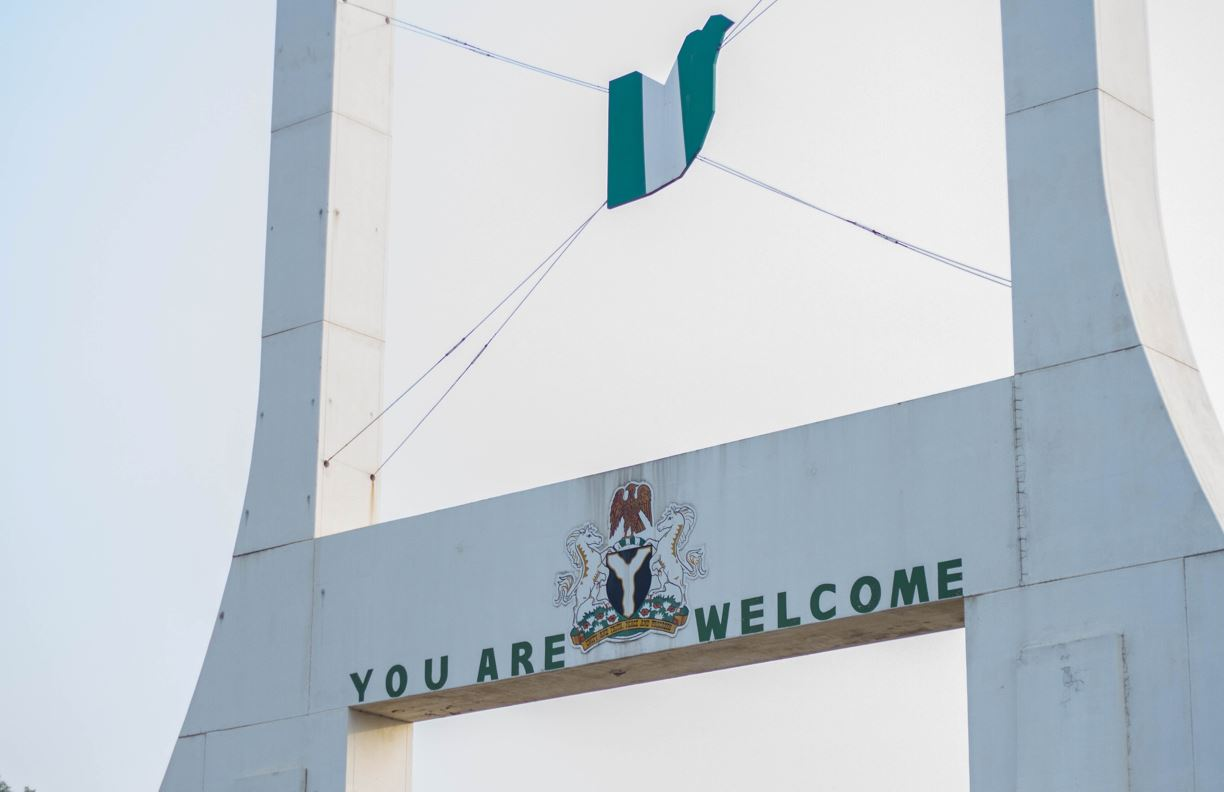

Photo by <a href="https://unsplash.com/@davidrotimi?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">David Rotimi</a> on <a href="https://unsplash.com/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  